<a href="https://colab.research.google.com/github/JJYL94/Machine-Learning-Credit-Default-Prediction/blob/main/EDA_FeatureEngineering_josh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:.3f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
C_Default = pd.read_csv("/content/drive/MyDrive/Innovation Studio/credit card default app_data.csv")
Cred_Default = pd.DataFrame(C_Default) # convert to data frame
Cred_Default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,Approved
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,Approved
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,Approved
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Approved
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,Approved


In [ ]:
Cred_Default.shape

(307511, 123)

123 columns and 307511 rows are present in the dataset

In [ ]:
Cred_Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to PREV_CONTRACT_STATUS
dtypes: float64(64), int64(42), object(17)
memory usage: 288.6+ MB


# Clean Data

In [ ]:
Cred_Default.columns[[96, 115]]

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_21'], dtype='object')

In [ ]:
Cred_Default['DOCUMENTS_GIVEN'] = Cred_Default.iloc[:, 96:115].sum(axis=1)
Cred_Default.shape

(307511, 124)

New column created using the Feature Extraction technique called 'DOCUMENTS_GIVEN'. The values in this column are the summation of the values in the 20 'FLAG_DOCUMENT_X' columns - i.e how many documents has the customer provided to the bank during this loan approval process. Our team have performed this technique given we don't even know what document the various features refer to, and so they are not useful on their own.

In [ ]:
Cred_Default.drop(Cred_Default.iloc[:, 96:116], inplace = True, axis = 1) # feature reduction

In [ ]:
Cred_Default.columns[[41, 90]] # feature reduction as most of these features are redundant/irrelevant to target

Index(['EXT_SOURCE_1', 'EMERGENCYSTATE_MODE'], dtype='object')

In [ ]:
Cred_Default.drop(Cred_Default.iloc[:, 41:90], inplace = True, axis = 1)
Cred_Default.drop((['OWN_CAR_AGE']), inplace = True, axis = 1)
Cred_Default.drop((['EMERGENCYSTATE_MODE']), inplace = True, axis = 1)

In [ ]:
Cred_Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Dataset has been substantially cleaned to now have only 53 attributes

# Data Visualisation and Exploration

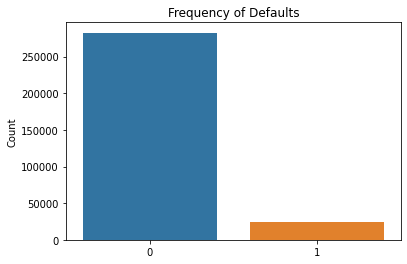

Value count for Default vs Non-Default:
0    282686
1     24825
Name: TARGET, dtype: int64


In [ ]:
sns.barplot(x = Cred_Default['TARGET'].value_counts().index, 
            y = Cred_Default['TARGET'].value_counts().values)
plt.title ("Frequency of Defaults")
plt.ylabel ("Count")
plt.show()
print("Value count for Default vs Non-Default:\n{}".format(Cred_Default['TARGET'].value_counts()))

~9% of the Loan applications ended in default, whilst ~91% did not

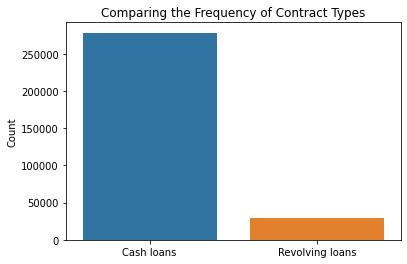

Value count for Contract Types:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


In [ ]:
sns.barplot(x = Cred_Default['NAME_CONTRACT_TYPE'].value_counts().index, 
            y = Cred_Default['NAME_CONTRACT_TYPE'].value_counts().values)
plt.title ("Comparing the Frequency of Contract Types")
plt.ylabel ("Count")
plt.show()
print("Value count for Contract Types:\n{}".format(Cred_Default['NAME_CONTRACT_TYPE'].value_counts()))

~90% of the Loan contract types applied for in the dataset are Cash loans, ~10% Revolving loans

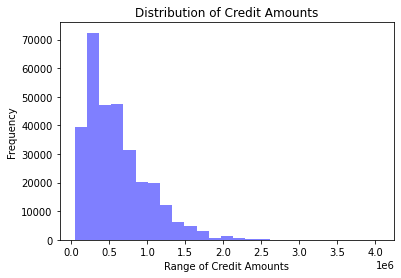

In [ ]:
# Matplotlib histogram is a useful way to understand the distribution of price data
_, ax = plt.subplots()
ax.hist(Cred_Default['AMT_CREDIT'], bins = 25, alpha = 0.5, facecolor = "blue")
plt.xlabel("Range of Credit Amounts")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Amounts")
plt.show()

Value count for Accompanied Type:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


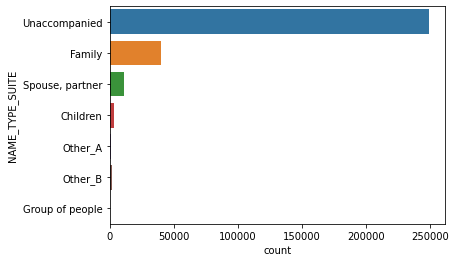

In [ ]:
p = sns.countplot(data=Cred_Default,
                  y = 'NAME_TYPE_SUITE')
print("Value count for Accompanied Type:\n{}".format(Cred_Default['NAME_TYPE_SUITE'].value_counts()))

Most applicants are unaccompanied when applying for loan (assumption: loans are applied for in person or at least after initial online process, the applicant comes in to provide/sign docs in person)

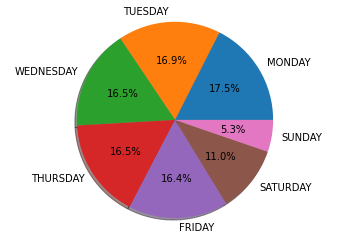

In [ ]:
# Using a pie chart to visualise PowerTrain
labels = ['MONDAY','TUESDAY','WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

sizes = [Cred_Default['WEEKDAY_APPR_PROCESS_START'].value_counts()[0],
         Cred_Default['WEEKDAY_APPR_PROCESS_START'].value_counts()[1],
         Cred_Default['WEEKDAY_APPR_PROCESS_START'].value_counts()[2],
         Cred_Default['WEEKDAY_APPR_PROCESS_START'].value_counts()[3],
         Cred_Default['WEEKDAY_APPR_PROCESS_START'].value_counts()[4],
         Cred_Default['WEEKDAY_APPR_PROCESS_START'].value_counts()[5],
         Cred_Default['WEEKDAY_APPR_PROCESS_START'].value_counts()[6],
]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Most applicants apply on weekdays and not weekends

In [ ]:
import plotly.express as px

temp_grp_df = Cred_Default.groupby(['TARGET', 'FLAG_OWN_CAR']).count().reset_index(drop=False)
temp_grp_df = temp_grp_df.assign(TARGET=temp_grp_df.TARGET.astype(str))
fig = px.bar(temp_grp_df, y='TARGET', x='SK_ID_CURR', orientation='h', color='FLAG_OWN_CAR', barmode='group')
fig.show()

69.4% of Applicants (17249/24825) who defaulted did not have their own car. This is higher than the proportion of Applicants who do not have their own car who did not default (65.7%).

In [ ]:
import plotly.express as px

temp_grp_df = Cred_Default.groupby(['TARGET', 'FLAG_OWN_REALTY']).count().reset_index(drop=False)
temp_grp_df = temp_grp_df.assign(TARGET=temp_grp_df.TARGET.astype(str))
fig = px.bar(temp_grp_df, y='TARGET', x='SK_ID_CURR', orientation='h', color='FLAG_OWN_REALTY', barmode='group')
fig.show()

Distribution is largely the same (68.40% v 69.45%) - might not be worth pursuing

In [ ]:
temp_grp_df = Cred_Default.groupby(['TARGET', 'LIVE_CITY_NOT_WORK_CITY']).count().reset_index(drop=False)
temp_grp_df = temp_grp_df.assign(TARGET=temp_grp_df.TARGET.astype(str))
fig = px.bar(temp_grp_df, y='TARGET', x='SK_ID_CURR', orientation='h', color='LIVE_CITY_NOT_WORK_CITY', barmode='group')
fig.show()

LIVE_CITY_NOT_WORK_CITY = 1 represents 19.5% of defaultees versus 17.6% for non-defaultees

In [ ]:
temp_grp_df = Cred_Default.groupby(['TARGET', 'REGION_RATING_CLIENT']).count().reset_index(drop=False)
temp_grp_df = temp_grp_df.assign(TARGET=temp_grp_df.TARGET.astype(str))
fig = px.bar(temp_grp_df, y='TARGET', x='SK_ID_CURR', orientation='h', color='REGION_RATING_CLIENT', barmode='group')
fig.show()

It looks like from the distribution, that City rating doesn't make a huge difference as to whether the client defaults or not - 6.25% versus 10.84% (Rating = 1). Need to consider 2nd Rating more closely.

In [ ]:
temp_grp_df = Cred_Default.groupby(['TARGET', 'NAME_EDUCATION_TYPE']).count().reset_index(drop=False)
temp_grp_df = temp_grp_df.assign(TARGET=temp_grp_df.TARGET.astype(str))
fig = px.bar(temp_grp_df, y='TARGET', x='SK_ID_CURR', orientation='h', color='NAME_EDUCATION_TYPE', barmode='group')
fig.show()

Defaulters don't have an Academic degree

---



In [ ]:
temp_grp_df = Cred_Default.groupby(['TARGET', 'NAME_HOUSING_TYPE']).count().reset_index(drop=False)
temp_grp_df = temp_grp_df.assign(TARGET=temp_grp_df.TARGET.astype(str))
fig = px.bar(temp_grp_df, y='TARGET', x='SK_ID_CURR', orientation='h', color='NAME_HOUSING_TYPE', barmode='group')
fig.show()

Defaulters do not live in Co-op apartments

# Data Preparation - Categorical Attributes to Binary Values

In order to fit the categorical attributes into the correlation matrix and test for statistical significance, I had to convert some key observations into binary values (i.e 1 and 0):
- NAME_CONTRACT_TYPE = "Cash loans"--> 1, otherwise 0
- CODE_GENDER = "M" --> 1, otherwise 0
- FLAG_OWN_CAR = "N" --> 1, otherwise 0
- FLAG_OWN_REALTY = "N" --> 1, otherwise 0
- NAME_TYPE_SUITE = "Unaccompanied" --> 1, otherwise 0
- NAME_INCOME_TYPE = "Working" --> 1, otherwise 0
- NAME_EDUCATION_TYPE = "Secondary / secondary special" --> 1, otherwise 0
- NAME_HOUSING_TYPE = "House / apartment" --> 1, otherwise 0
- PREV_CONTRACT_STATUS = "Approved" --> 0, otherwise 1

Most of the other features unfortunately have too much cardinality to easily convert into binary values

In [ ]:
Cred_Default['NAME_CONTRACT_TYPE'] = (Cred_Default['NAME_CONTRACT_TYPE'] == "Cash loans").astype("int64")
Cred_Default['CODE_GENDER'] = (Cred_Default['CODE_GENDER'] == "M").astype("int64")
Cred_Default['FLAG_OWN_CAR'] = (Cred_Default['FLAG_OWN_CAR'] == "N").astype("int64")
Cred_Default['FLAG_OWN_REALTY'] = (Cred_Default['FLAG_OWN_REALTY'] == "N").astype("int64")
Cred_Default['NAME_TYPE_SUITE'] = (Cred_Default['NAME_TYPE_SUITE'] == "Unaccompanied").astype("int64")
Cred_Default['NAME_HOUSING_TYPE'] = (Cred_Default['NAME_HOUSING_TYPE'] == "House / apartment").astype("int64")
Cred_Default['NAME_INCOME_TYPE'] = (Cred_Default['NAME_INCOME_TYPE'] == "Working").astype("int64")
Cred_Default['NAME_EDUCATION_TYPE'] = (Cred_Default['NAME_EDUCATION_TYPE'] == "Secondary / secondary special").astype("int64")
Cred_Default['PREV_CONTRACT_STATUS'] = (Cred_Default['PREV_CONTRACT_STATUS'] != "Approved").astype("int64")

In [ ]:
Cred_Default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_CONTRACT_STATUS,DOCUMENTS_GIVEN
0,100002,1,1,1,1,0,0,202500.000,406597.500,24700.500,...,2.000,-1134,0.000,0.000,0.000,0.000,0.000,1.000,0,1
1,100003,0,1,0,1,1,0,270000.000,1293502.500,35698.500,...,0.000,-828,0.000,0.000,0.000,0.000,0.000,0.000,0,1
2,100004,0,0,1,0,0,0,67500.000,135000.000,6750.000,...,0.000,-815,0.000,0.000,0.000,0.000,0.000,0.000,0,0
3,100006,0,1,0,1,0,0,135000.000,312682.500,29686.500,...,0.000,-617,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,100007,0,1,1,1,0,0,121500.000,513000.000,21865.500,...,0.000,-1106,0.000,0.000,0.000,0.000,0.000,0.000,0,1


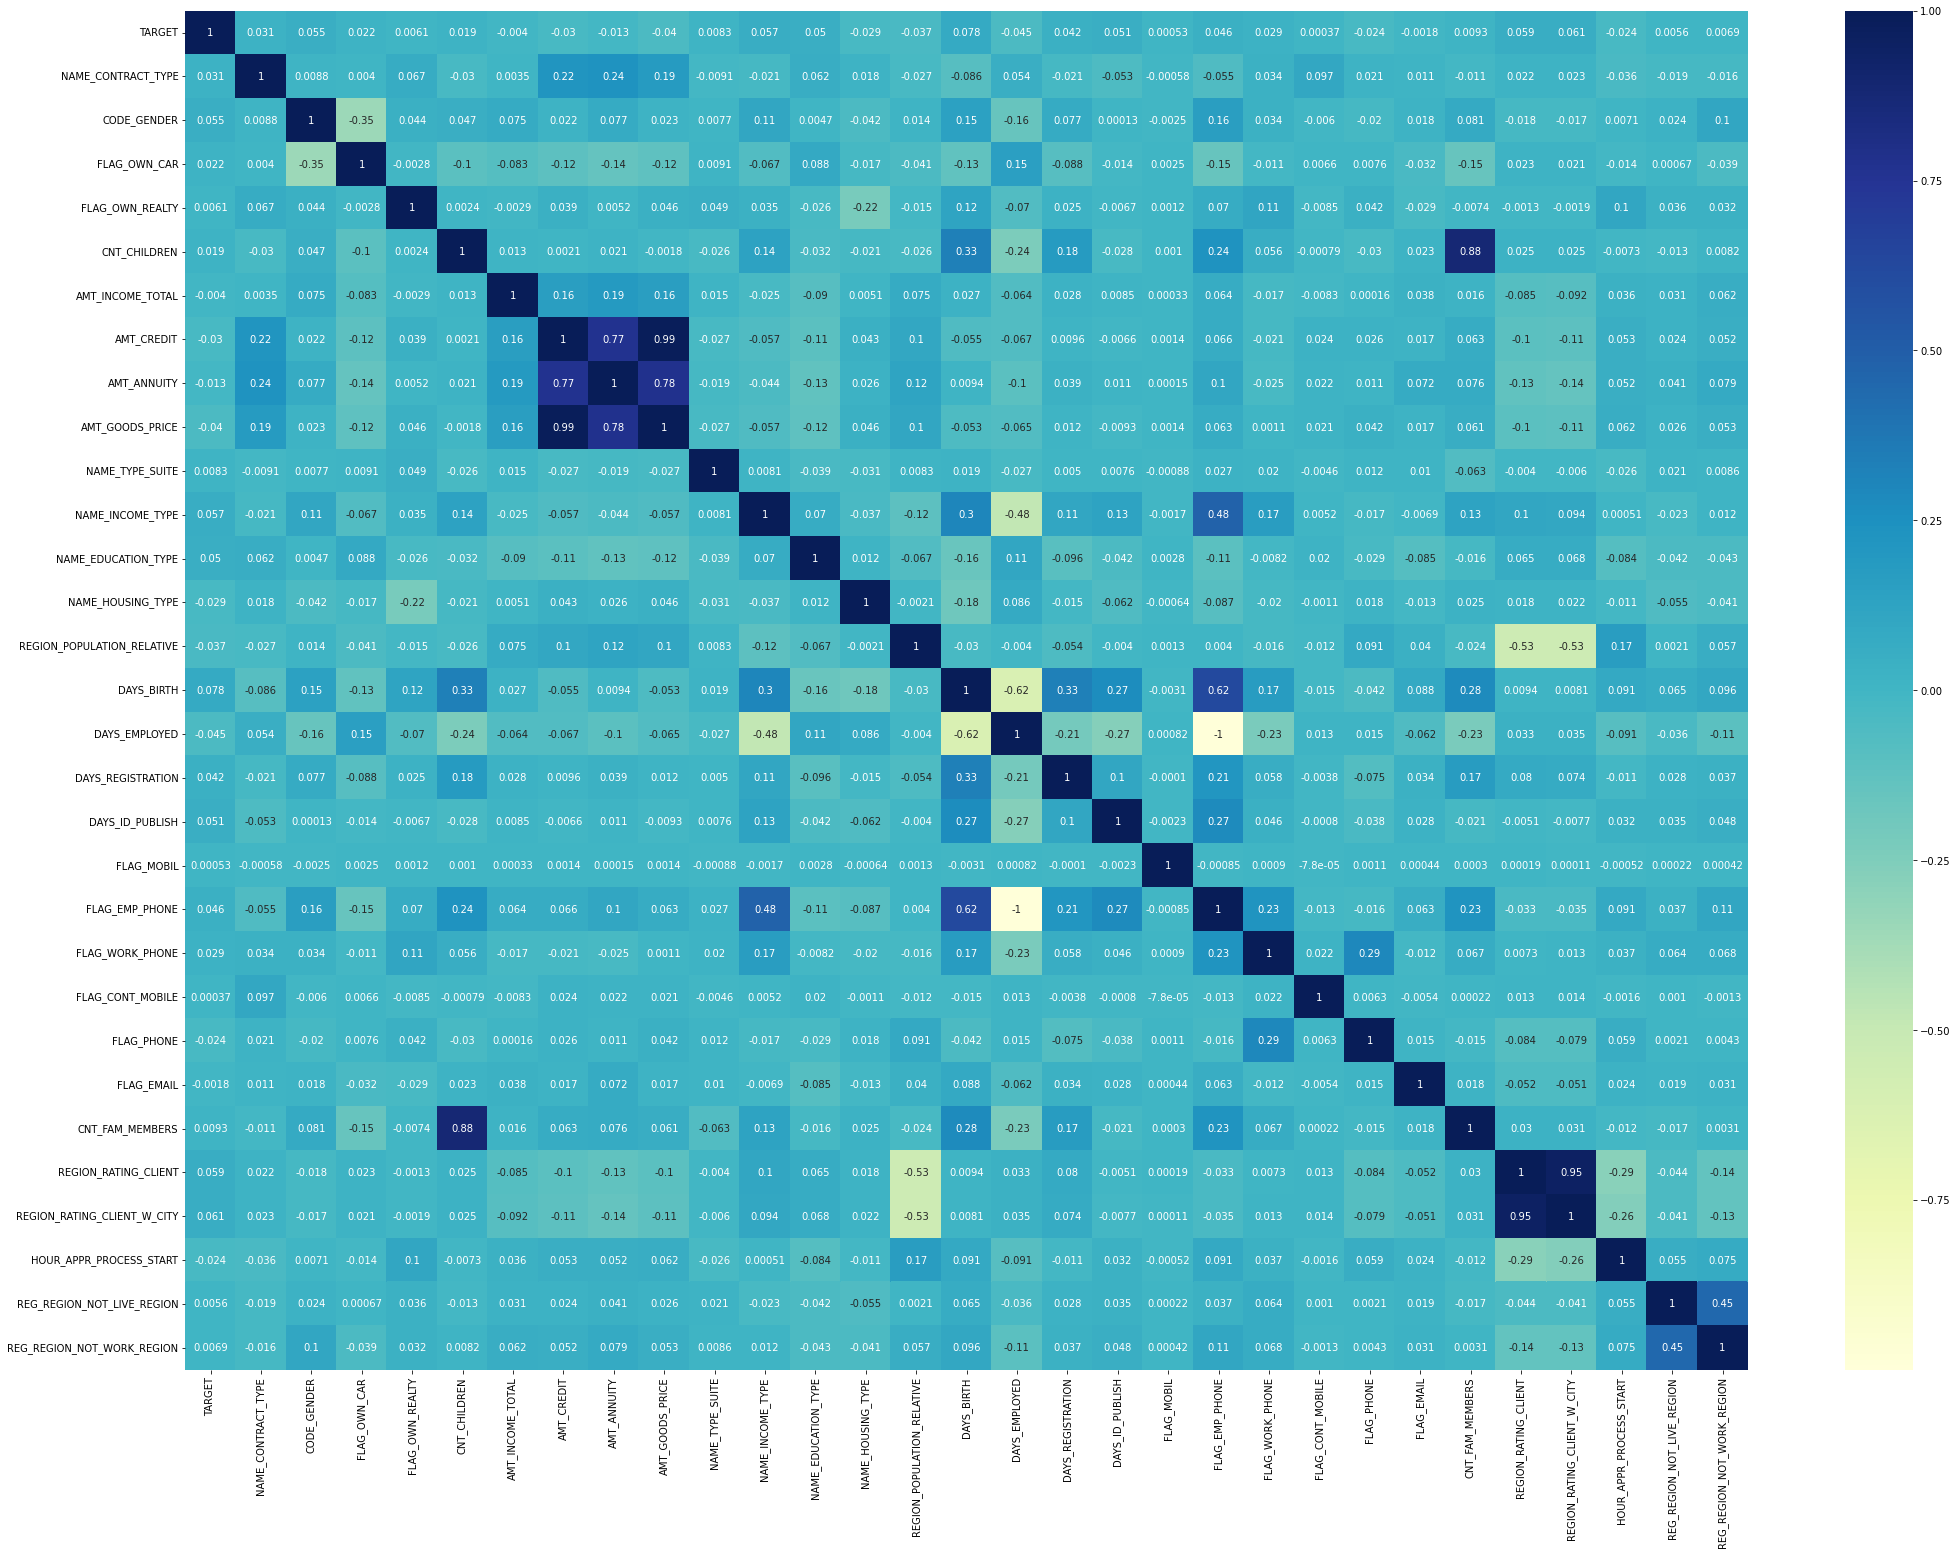

In [ ]:
# Organising attributes into a correlation heatmap
CredDef_small = Cred_Default.iloc[:,1:35]
correlation_mat = CredDef_small.corr()
plt.figure(figsize = (35, 25))
sns.heatmap(correlation_mat, annot = True, cmap = 'YlGnBu')


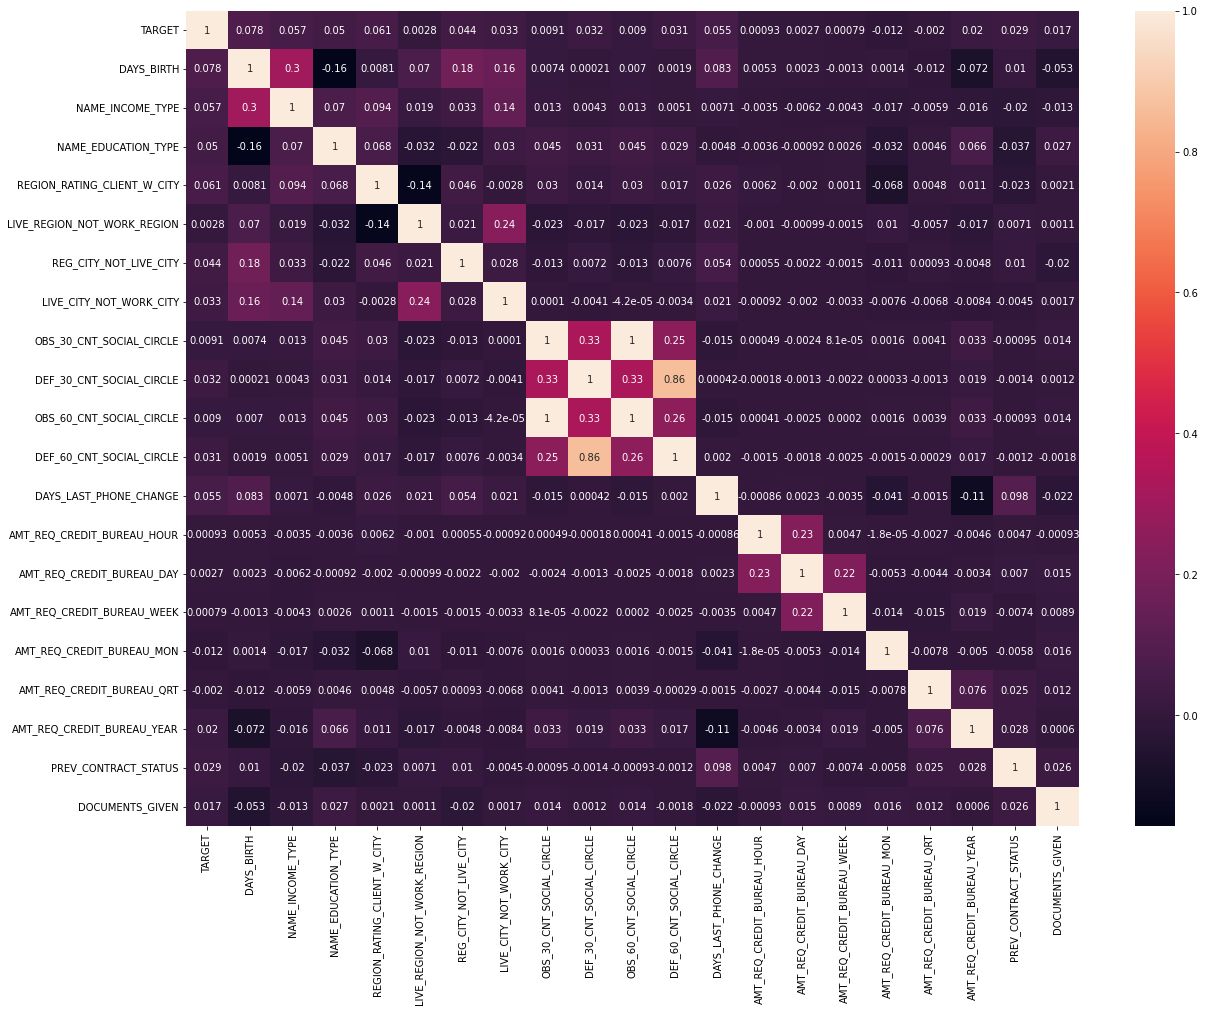

In [ ]:
CredDef_small2 = Cred_Default[['TARGET', 'DAYS_BIRTH', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'PREV_CONTRACT_STATUS', 'DOCUMENTS_GIVEN']]
correlation_mat2 = CredDef_small2.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_mat2, annot = True)

The features that our team plan to use in the Machine Learning models (taking into account relevance, multicollinearity and missing values) are:
- CODE_GENDER
- NAME_CONTRACT_TYPE
- FLAG_OWN_CAR
- AMT_CREDIT
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_HOUSING_TYPE
- DAYS_BIRTH
- DAYS_ID_PUBLISH
- FLAG_WORK_PHONE
- REGION_RATING_CLIENT_W_CITY
- LIVE_CITY_NOT_WORK_CITY
- REG_CITY_NOT_LIVE_CITY
- DAYS_LAST_PHONE_CHANGE
- PREV_CONTRACT_STATUS

These 15 features/attributes appear to have higher absolute correlation with the target of Default based on the matrixes above.